<center> <h1> "Unlock Your Financial Freedom with Stock Market Predictions!" </h1> </center>

In this notebook we would be trying to predict if the stock price of Google will increase or decrease based on the historical idea. We would be using something known as backtesting and hyperparameter tuning to increase the precision score of our  <b> XGBoost Classifier. </b>
<p align='justify'>
Google was <i> founded on September 4, 1998</i>, by <b>Larry Page</b> and <b>Sergey Brin</b> while they were PhD students at Stanford University in California. Together they own about 14% of its publicly listed shares and control 56% of the stockholder voting power through super-voting stock. The company went public via an initial public offering (IPO) in 2004. In 2015, Google was reorganized as a wholly owned subsidiary of Alphabet Inc. 
</p>  

<center> <img src="https://media0.giphy.com/media/PCya6Lr0RYHM4/giphy.gif?cid=790b7611615c1b753c157b10bf33e47adc7a782fc57f2221&rid=giphy.gif&ct=g"> </center>


Google is <b> Alphabet's largest subsidiary </b>  and is a holding company for Alphabet's Internet properties and interests. <b> Sundar Pichai </b>  was appointed CEO of Google on October 24, 2015, replacing Larry Page, who became the CEO of Alphabet. On December 3, 2019, Mr. Pichai also became the CEO of Alphabet.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Importing Libraries
    
</h2>
</div>
    
</center>

In [1]:
#Installing yfinance library
!pip install yfinance --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.


In [2]:
#all the imports and the dependencies required for the noteboo

import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Reading the data from yfinance library
    
</h2>
</div>
    
</center>

Yahoo Finance uses `pandas` library and automatically puts the entire data into a nice looking dataframe. We are using the `max` period to fetch all of the data of **Google** Stock prices.

In [3]:
# This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
data = yf.Ticker("GOOGL")
#create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
data_hist = data.history(period="max")
# prints the data_hist variable
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,87.110001,89.550003,87.070000,89.230003,22994400,0.0,0.0
2022-12-27 00:00:00-05:00,88.800003,88.940002,87.010002,87.389999,20097300,0.0,0.0
2022-12-28 00:00:00-05:00,86.980003,88.040001,85.940002,86.019997,19523200,0.0,0.0


In [4]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 4625 rows and 7 columns


The below chart shows us how the prices have fluctuated over the months, years, and trading days.

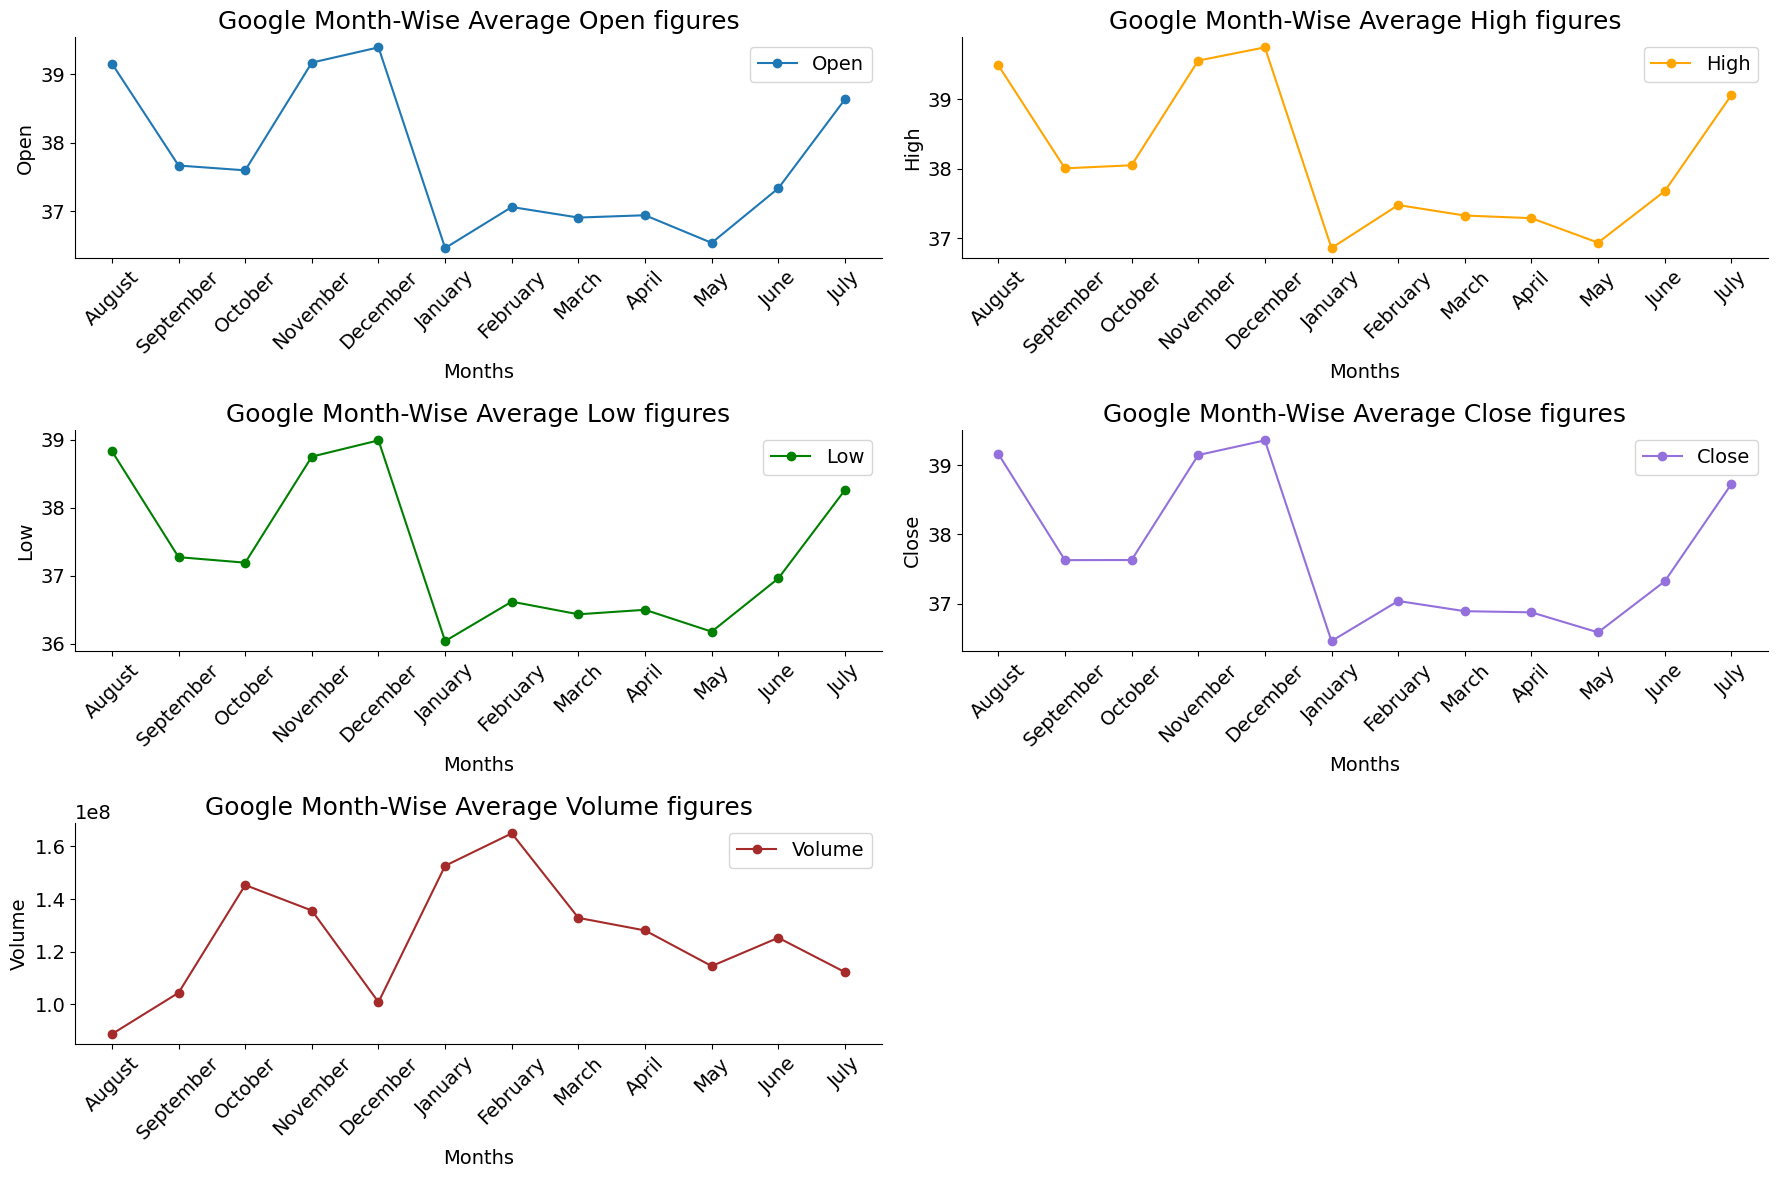

In [5]:
color=['C0', 'orange','green', 'mediumpurple', 'brown']
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

#Loop through the each column in the dataframe to generate a subplot
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color[i], marker='o')
    #Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot counter
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

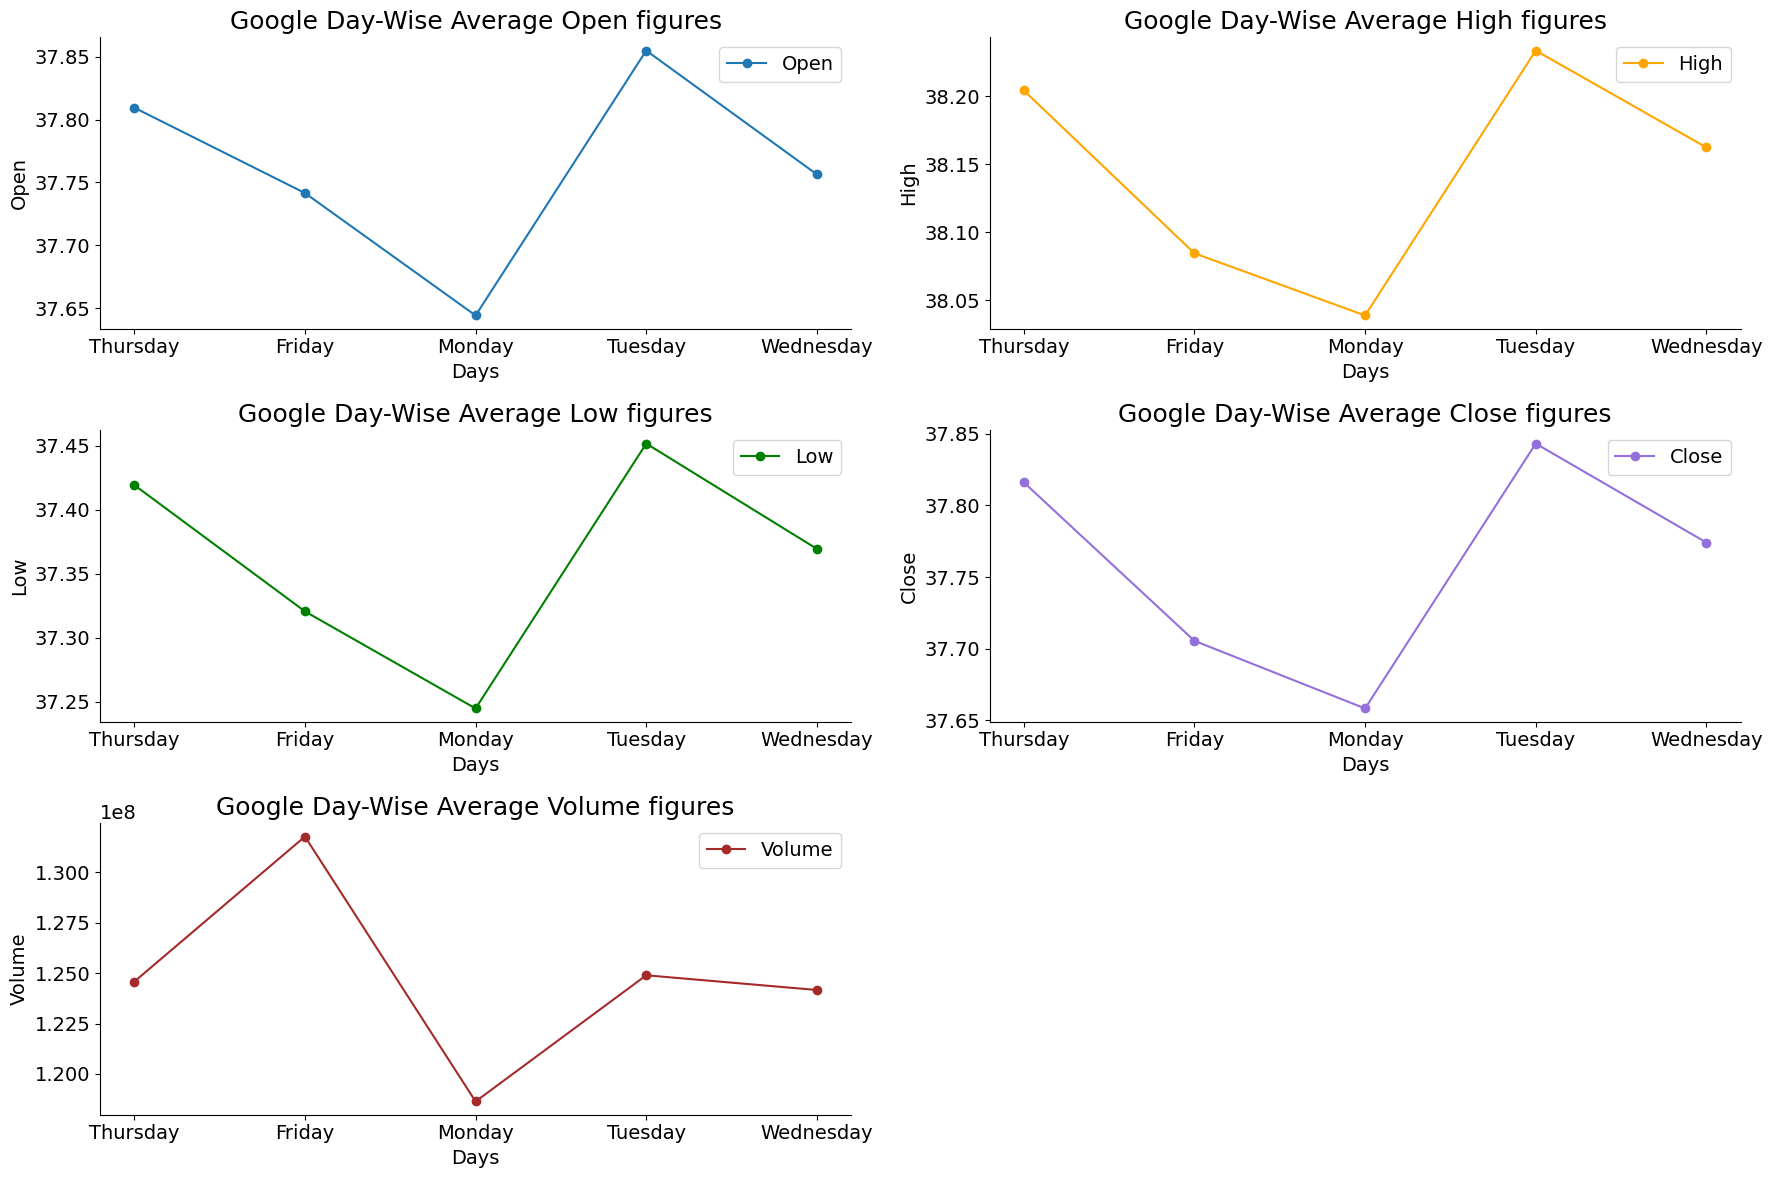

In [6]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,12))

for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    plt.subplot(a, b, c)
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color[i], marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

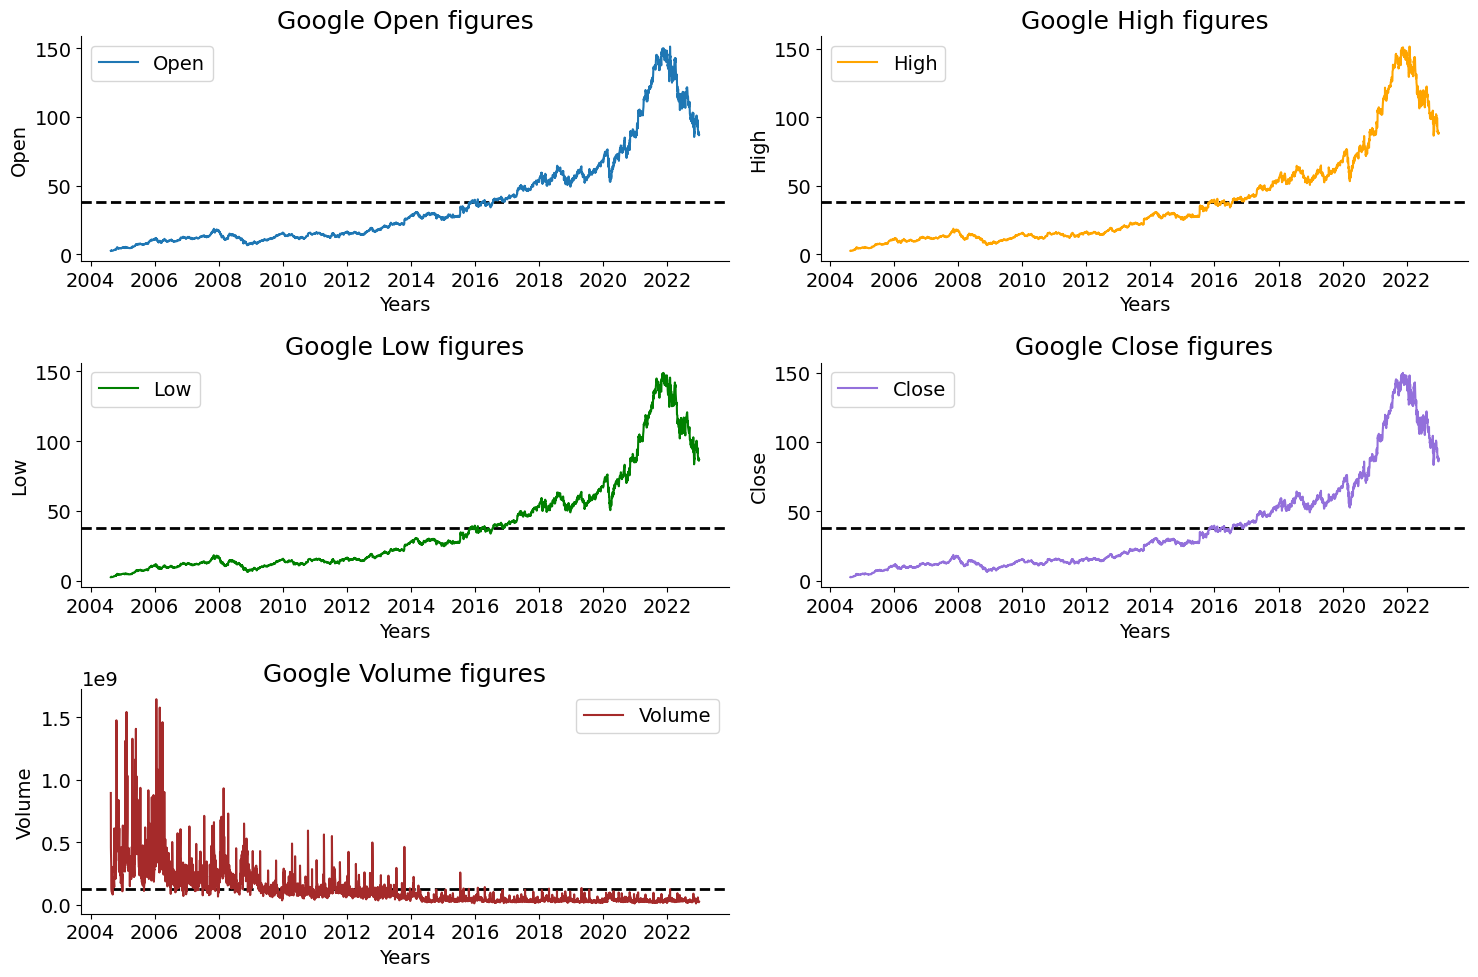

In [7]:
# This code plots open high low and close columns in a dataframe, data_hist.

# The number of rows, columns, and the subplot counter are initialized. 
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized 
fig = plt.figure(figsize=(15,10))

for i in range(len(data_hist.columns[:-2])):
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(data_hist[data_hist.columns[i]], color = color[i])
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(data_hist.columns[i])
    #Adding Legend
    plt.legend([data_hist.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

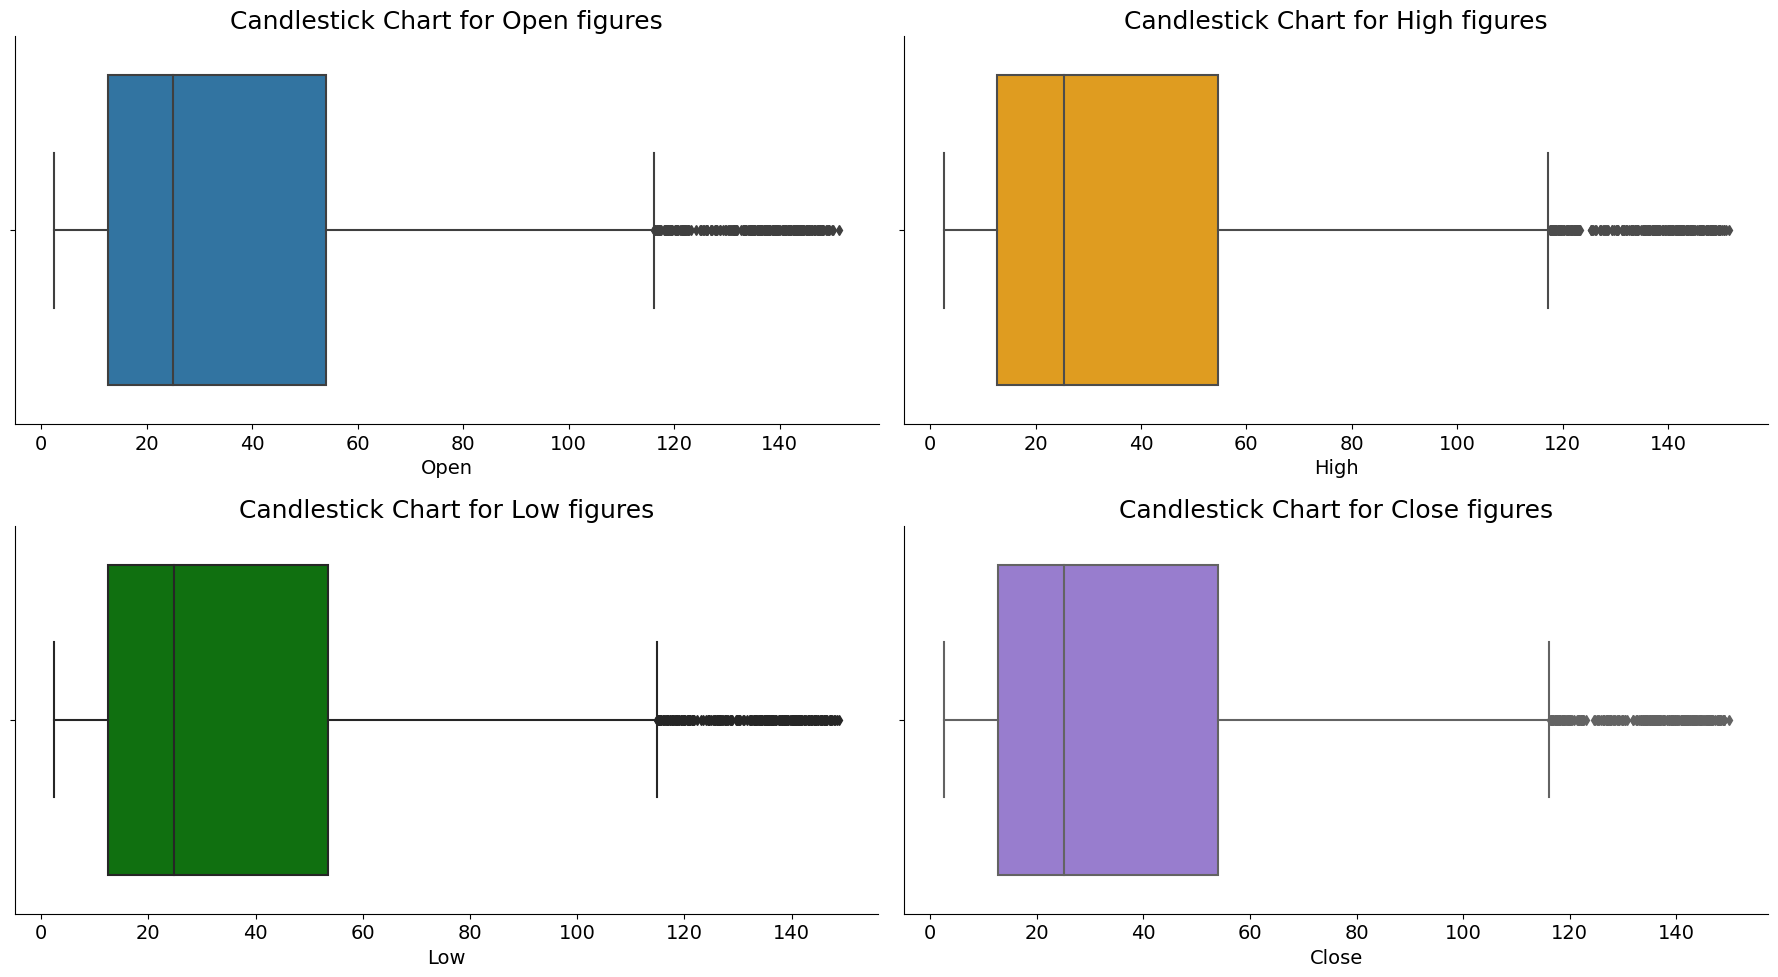

In [8]:
# This code plots boxplots of various columns in a dataframe, data_hist.

color=['C0', 'orange','green', 'mediumpurple']

# The number of rows, columns, and the subplot counter are initialized. 
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized  
fig = plt.figure(figsize=(18,10))

#loop is used to iterate over the columns of dataframe. 
for i in range(len(data_hist.columns[:-3])):
    plt.subplot(a, b, c)
    #For each column, a boxplot is plotted and labels and titles are set accordingly. 
    sns.boxplot(data_hist[data_hist.columns[i]], color= color[i] )
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #X Axis label is added
    plt.xlabel(data_hist.columns[i])
    #title to the plot is added
    plt.title(f'Candlestick Chart for {data_hist.columns[i]} figures', fontsize=18)
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

In [9]:
def candlestick(t, o, h, l, c):
    """
    # This function takes in five variables, t (time), o (open price), h (high price), 
    l (low price), c (close price) to plot a candlestick chart. 
    """
    
    # Sets the figure size.
    plt.figure(figsize=(22,5))
    # Sets the color based on whether the close price is greater than the open price.
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    # Plots the absolute difference between open and close prices, from the minimum of the two.
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color)
    # Plots the difference between the high and low price, from the low price.
    plt.bar(x=t, height=h-l, bottom=l, color=color)
    # Hides the Plot grid.
    plt.grid(visible=False)
    # Sets the title of the chart.
    plt.title('Candlestick Chart')

In [10]:
# set start and end dates for the plot
today = date.today()
start = '2020-12-31'
end = today

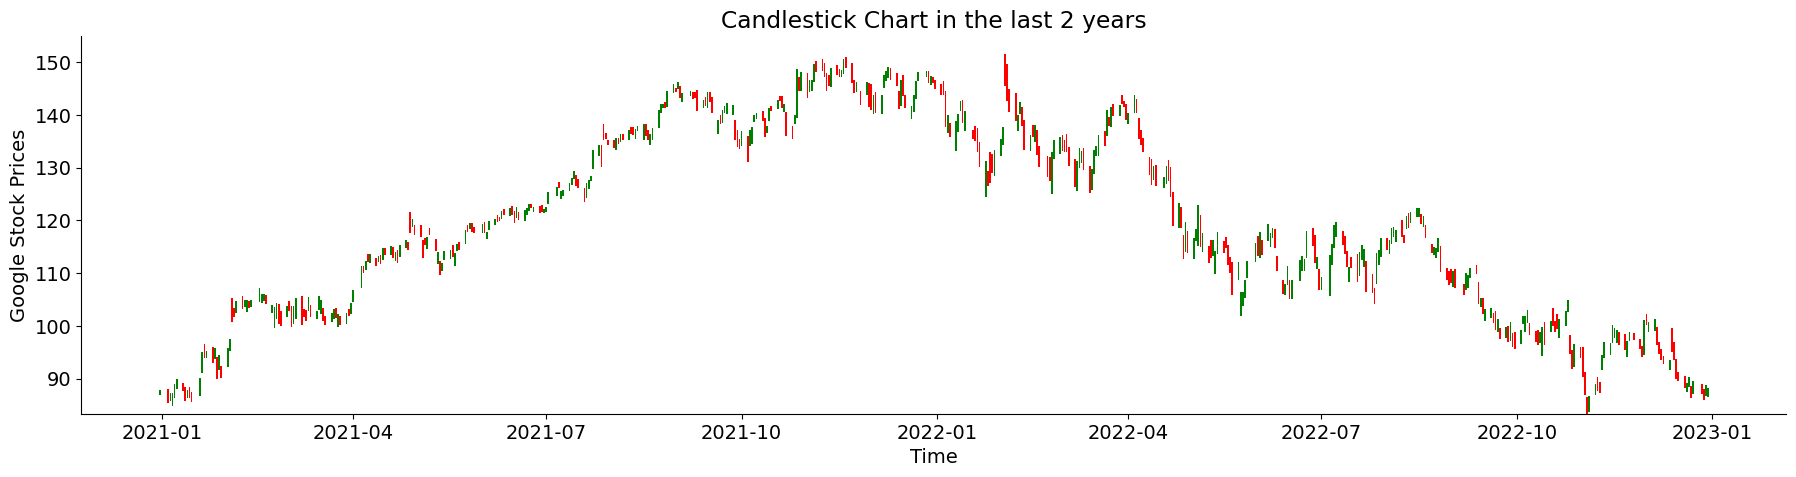

In [11]:
#passing in the index with Open, High, Low And Close Values to the function we created above
candlestick(
    data_hist[start:end].index,
    data_hist[start:end]["Open"],
    data_hist[start:end]["High"],
    data_hist[start:end]["Low"],
    data_hist[start:end]["Close"]
)
# remove chart spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#adding x axis label
plt.xlabel('Time')
#adding y axis label
plt.ylabel('Google Stock Prices')
#Adding the title to the chart
plt.title('Candlestick Chart in the last 2 years')
#showing the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Adding Target Values
    
</h2>
</div>
    
</center>

We are adding the target column where the column will say 0 or 1. 0 meaning the price went down and 1 would mean the price went up.

We will be using the rolling method of Pandas library. Rolling method will look at the number of rows in the data (in our case 2) and then what we are saying is return 1st row if the 2nd row is higher else return 0 and this gives us our target.

In [12]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Date
2004-08-19 00:00:00-04:00    NaN
2004-08-20 00:00:00-04:00    1.0
2004-08-23 00:00:00-04:00    1.0
2004-08-24 00:00:00-04:00    0.0
2004-08-25 00:00:00-04:00    1.0
                            ... 
2022-12-23 00:00:00-05:00    1.0
2022-12-27 00:00:00-05:00    0.0
2022-12-28 00:00:00-05:00    0.0
2022-12-29 00:00:00-05:00    1.0
2022-12-30 00:00:00-05:00    0.0
Name: Close, Length: 4625, dtype: float64

In [13]:
# This code adds a new column called "Target" to the data_hist dataframe. 
#The values in the target column are determined by comparing the current value in the "Close" column with the previous value. 
#If the current value is larger than the previous value, the target column value will be set to True. 
#If the current value is smaller than the previous value, the target column value will be set to False.

data_hist["Target"] = data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Now that we have our target, <i >we would shift our data by 1 row</i>. 

- What that means is data of 19-08-2004 will shift to the next available data which is 20-08-2004. This means we would, in real scenario, be using yesterday's data to predict tomorrow. 

- However if we were not to do that what we would be doing is using today's data to predict today's target which is something that is likely to render terrible results in real life situations.

In [14]:
#Copy the data_hist dataframe and store it in a new dataframe named df
df = data_hist.copy()

#Shift the data in the dataframe by one row
df = df.shift(1)

#Display the first five rows of the shifted df
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-19 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924.0,0.0,0.0,NaN
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.0,0.0


Originally we had `Open`, `High`, `Low`, `Close`, `Volume`, `Dividends`, `Stock Splits` but we are only using `Open`, `High`, `Low`, `Close`, `Volume`, as our predictors for the model. Later on we would add more predictors that will help our model perform better.

In [15]:
#Create a list of predictors 
predictors = ["Close", "Volume", "Open", "High", "Low"]

#Select the columns in the data for the predictors and the target
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

#Print the first five rows of the data
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0


Our classes have a bit of a class imbalance which we will deal with later on using the `RandomOverSampler` from the `imblearn` library and that's going to ensure the occurence of both the classes is equal which will help in a way that the model will not be biased towards a certain class.

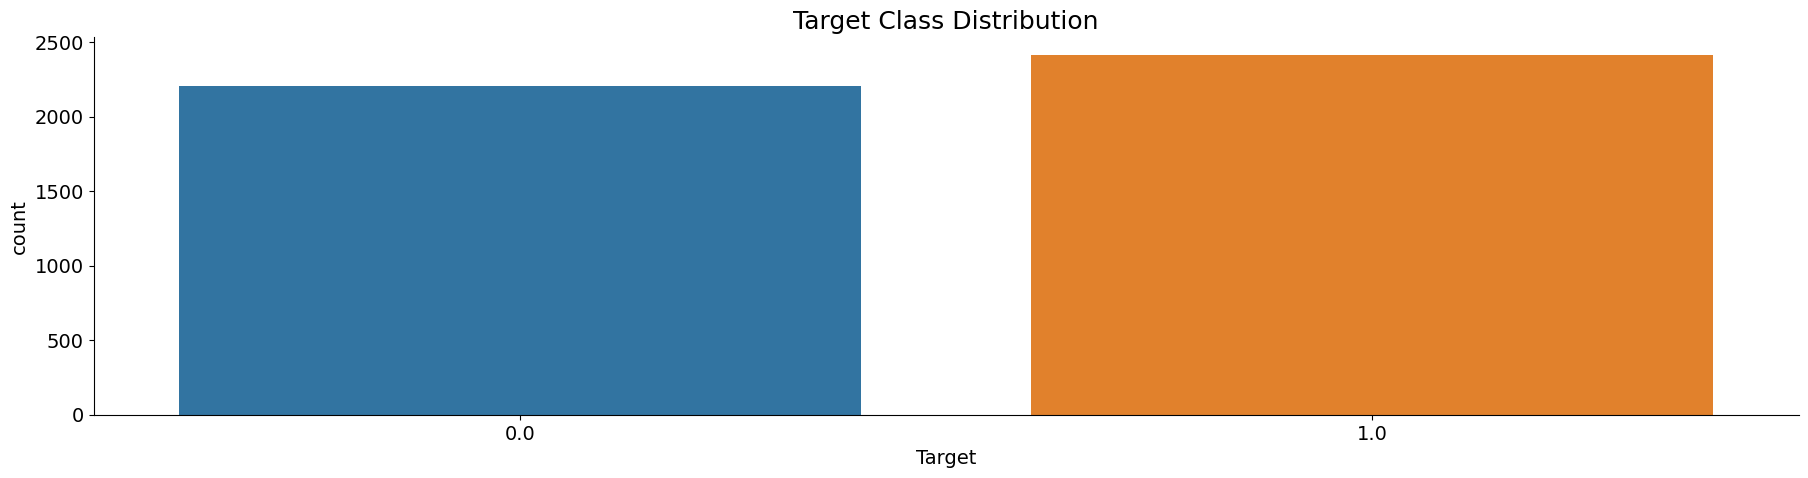

In [16]:
#creates a countplot of the Target column from the dataframe df
sns.countplot(df['Target'])

#removes the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#labels the x-axis of the plot
plt.xlabel('Target')

#adds a title to the plot
plt.title('Target Class Distribution', fontsize=18)

#shows the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Spliiting and Resampling Data, Training Model
    
</h2>
</div>
    
</center>

As we saw earlier that there is a slight imbalance in our classes, we will go ahead and resample the data. We are initializing the `RandomOverSampler` object and then resampling our inputs and the targets.

In [17]:
# Initiate a RandomOverSampler object and assigns it to the variable 'ros'.
ros = RandomOverSampler(random_state=0)

# Assigns the feature data to the variable 'X'.
X = df[["Open", "High", "Low", "Close", "Volume"]]

# Assigns the target data to the variable 'y'.
y = df['Target'].values

# Apply RandomOverSampler to the feature and target data then assigns the data to the variables 'X_resampled' & 'y_resampled'.
X_resampled, y_resampled  = ros.fit_resample(X,y)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Countplot of Resampled Classes
    
</h2>
</div>
    
</center>

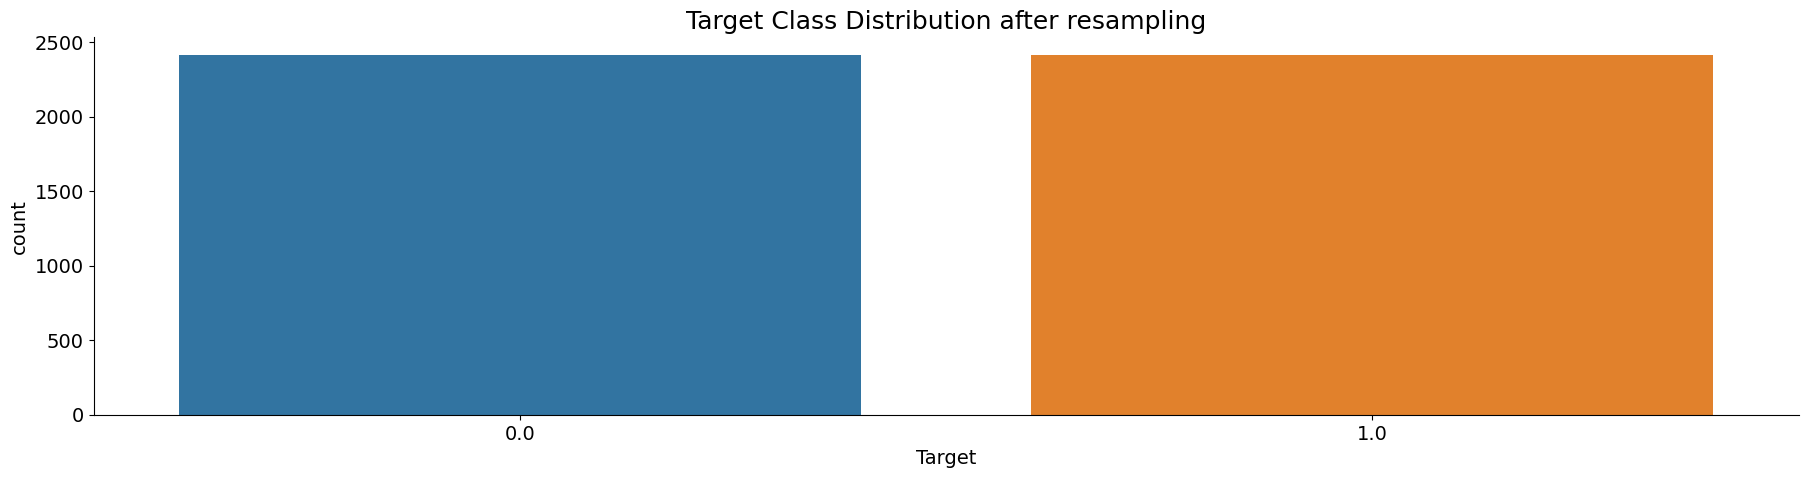

In [18]:
#plotting a countplot of the resampled target values
sns.countplot(y_resampled)
#hiding the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#labeling the x-axis
plt.xlabel('Target')
#adding a title
plt.title('Target Class Distribution after resampling', fontsize=18)
#displaying the plot
plt.show()

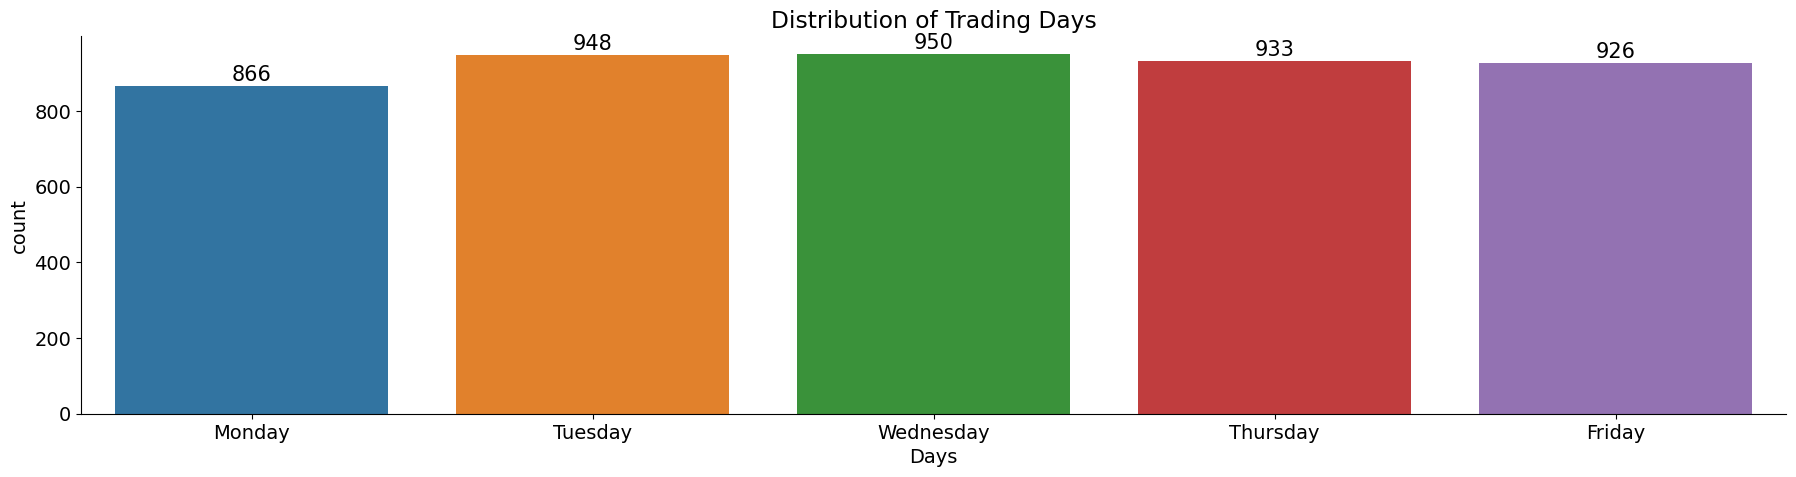

In [19]:
# Creates a countplot using seaborn, with the data being the day of the week from the 'df' dataframe
ax = sns.countplot(df.index.day_name())

# Removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Labels the x-axis
plt.xlabel('Days')

# Adds a title to the plot
plt.title('Distribution of Trading Days')

# Loops through each bar in the plot and adds an annotation with the height of the bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

# Displays the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Train Test Split
    
</h2>
</div>
    
</center>

Since it's sequential data, what we have done here to split the data into training and test dataset is alloted 75% rows to the training data and the rest of the rows will be used to validate the data.

In [20]:
# Calculate the threshold for splitting the data into training and testing
threshold = int(len(X_resampled)*0.75)

In [21]:
# Split the resampled data into training and testing sets
X_train, y_train = X_resampled.iloc[:threshold, :], y_resampled[:threshold]
X_test, y_test = X_resampled.iloc[threshold:, :], y_resampled[threshold:]

In [22]:
X_train

,Open,High,Low,Close,Volume
0,2.527778,2.729730,2.515015,2.710460,456686856.0
1,2.771522,2.839840,2.728979,2.737738,365122512.0
2,2.783784,2.792793,2.591842,2.624374,304946748.0
3,2.626627,2.702703,2.599600,2.652653,183772044.0
4,2.626376,2.701451,2.619119,2.700450,141897960.0
...,...,...,...,...,...
3616,51.360001,53.039501,51.264000,52.734001,31868000.0
3617,52.533501,53.313000,51.118500,51.273499,41960000.0
3618,52.127998,54.000000,51.842999,53.903500,46022000.0
3619,54.048500,54.134998,53.132000,53.796001,47446000.0


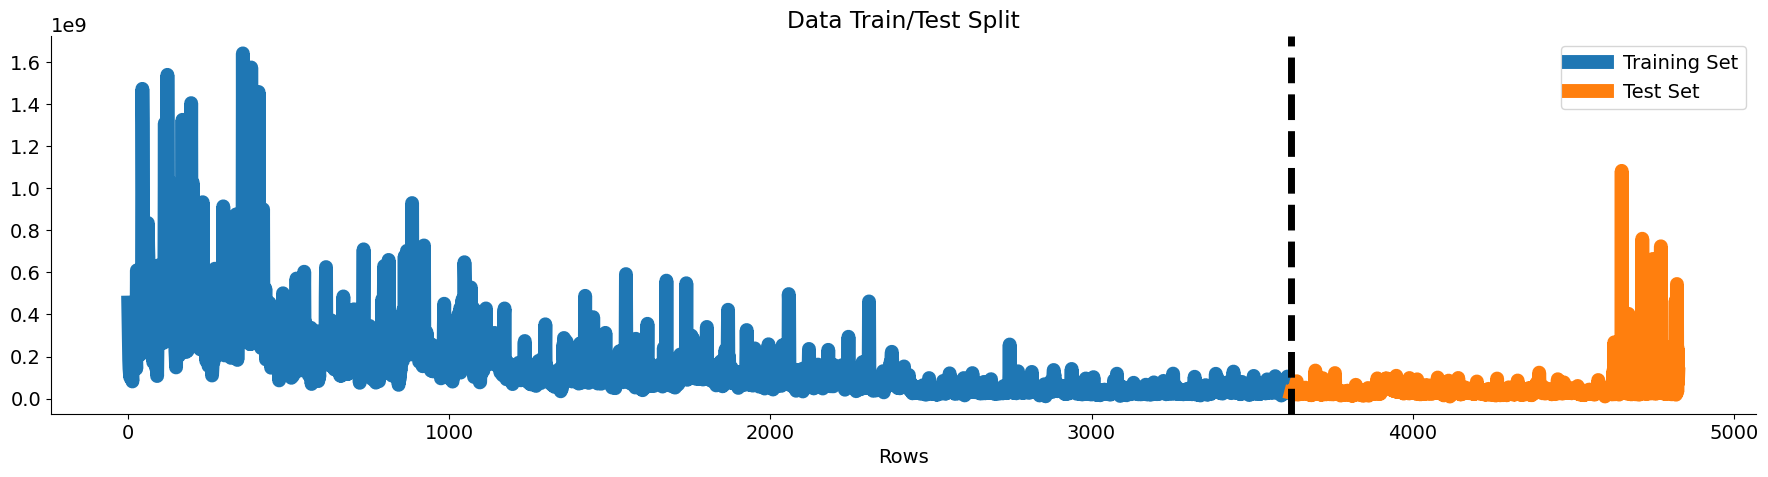

In [23]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
X_train['Volume'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=10)

# Plot the Volume column from the test set on the axis
X_test['Volume'].plot(ax=ax, label='Test Set',  linewidth=10)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline(threshold, color='black', ls='--', lw=5)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Rows')

# Show the plot
plt.show()

In [24]:
print(f'X_train Shape {X_train.shape}, y_train Shape {y_train.shape}')
print(f'X_test shape {X_test.shape}, y_test shape {y_test.shape}')

X_train Shape (3621, 5), y_train Shape (3621,)
X_test shape (1207, 5), y_test shape (1207,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Base Model
    
</h2>
</div>
    
</center>

We are starting off with a base model with the max_depth of 3 and a learning rate of 1 and the rest of parameters are default. 

In the fit method we are using `Early Stopping` which is an approach to training complex machine learning models to avoid overfitting. It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit. **XGBoost** supports *early stopping* after a fixed number of iterations. In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.

Since we want to track the performance of the model on the both training and test set, we have given the model training and test set in the form of tuples and we are tracking the classification error and the logloss passed into the `eval_metric` argument.

In [25]:

#1: Instantiate an XGBClassifier with a max_depth of 3 and a learning_rate of 0.1
model = XGBClassifier(max_depth=3, learning_rate=0.1)

#2: Fit the model to the training data, using early_stopping_rounds of 10, 
#with evaluation sets of the training and test data, evaluating on the metrics "error" and "logloss", and set verbose to 0
history = model.fit(X_train, y_train, early_stopping_rounds =10, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)

#3: Make predictions on the test data
predictions = model.predict(X_test)

In [26]:
y_test[:5]

array([0., 0., 0., 0., 1.])

In [27]:
predictions[:5]

array([1, 1, 1, 1, 1])

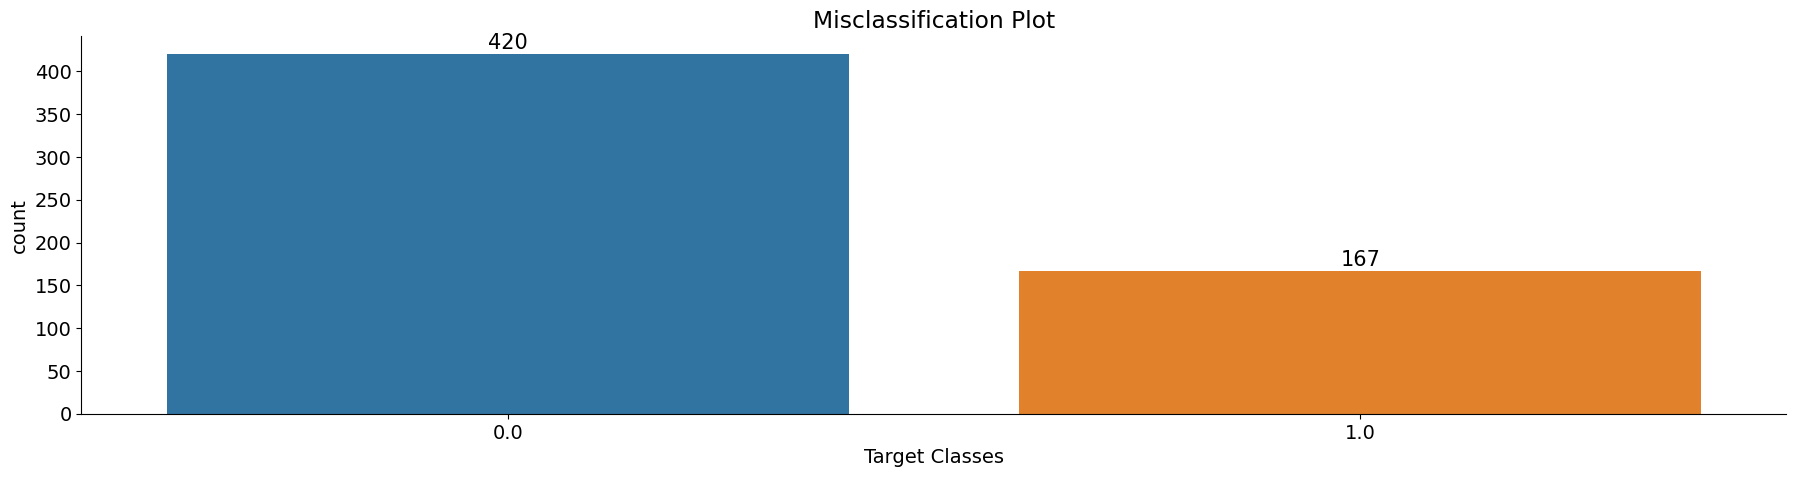

In [28]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.38      0.46       674
         1.0       0.47      0.69      0.55       533

    accuracy                           0.51      1207
   macro avg       0.53      0.53      0.51      1207
weighted avg       0.54      0.51      0.50      1207



Below are the parameters used while training the XGBoost model.

In [30]:
history.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

Let's now try to plot the training and validation loss.

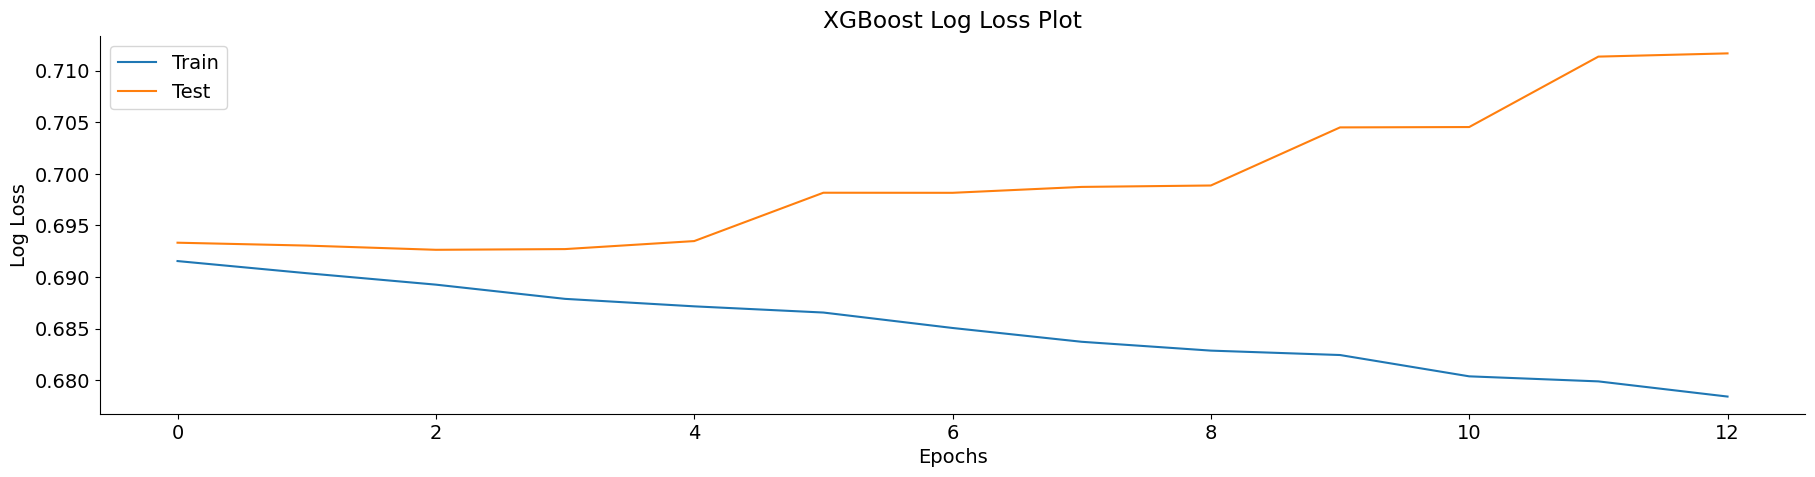

In [31]:
#get the number of epochs (iterations) used in training
epochs = len(history.evals_result_['validation_0']['error'])

#create a range from 0 to the number of epochs
x_axis = range(0, epochs)

#create a figure and axes for plotting
fig, ax = plt.subplots()

#plot the training and test log loss values against the x-axis (epochs)
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test')

#hide the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#show the legend
ax.legend()

#label the axes and add a title
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')

#show the plot
plt.show()

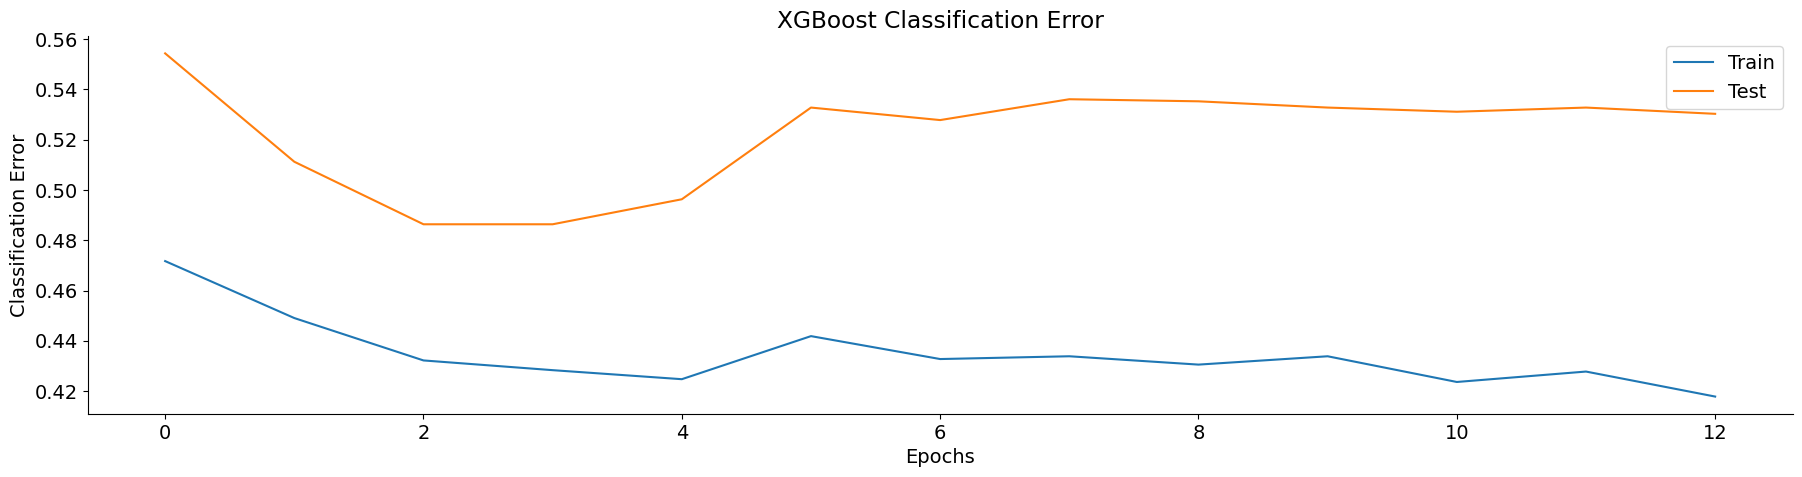

In [32]:
#This line sets the epochs equal to the length of the history object's evaluation result
epochs = len(history.evals_result_['validation_0']['error'])

#This line sets the x-axis range for the graph as 0 to the number of epochs
x_axis = range(0, epochs)

#This line creates the figure and axis objects for the graph
fig, ax = plt.subplots()

#This line plots the training error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train')

#This line plots the test error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test')

#This line removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line adds a legend to the plot
ax.legend()

#This line labels the x-axis as 'Epochs'
plt.xlabel('Epochs')

#This line labels the y-axis as 'Classification Error'
plt.ylabel('Classification Error')

#This line titles the plot as 'XGBoost Classification Error'
plt.title('XGBoost Classification Error')

#This line displays the plot
plt.show()

We see that the model is overfitting and the both the dataset error is somewhat following each other, we are going to go ahead and tune the hyperparameters to get the best parameters for the model.

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Increasing Depth and Adding L2 Regularization
    
</h2>
</div>
    
</center>

In [33]:
model = XGBClassifier(max_depth=7, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.16      0.27       674
         1.0       0.46      0.92      0.62       533

    accuracy                           0.50      1207
   macro avg       0.59      0.54      0.44      1207
weighted avg       0.60      0.50      0.42      1207



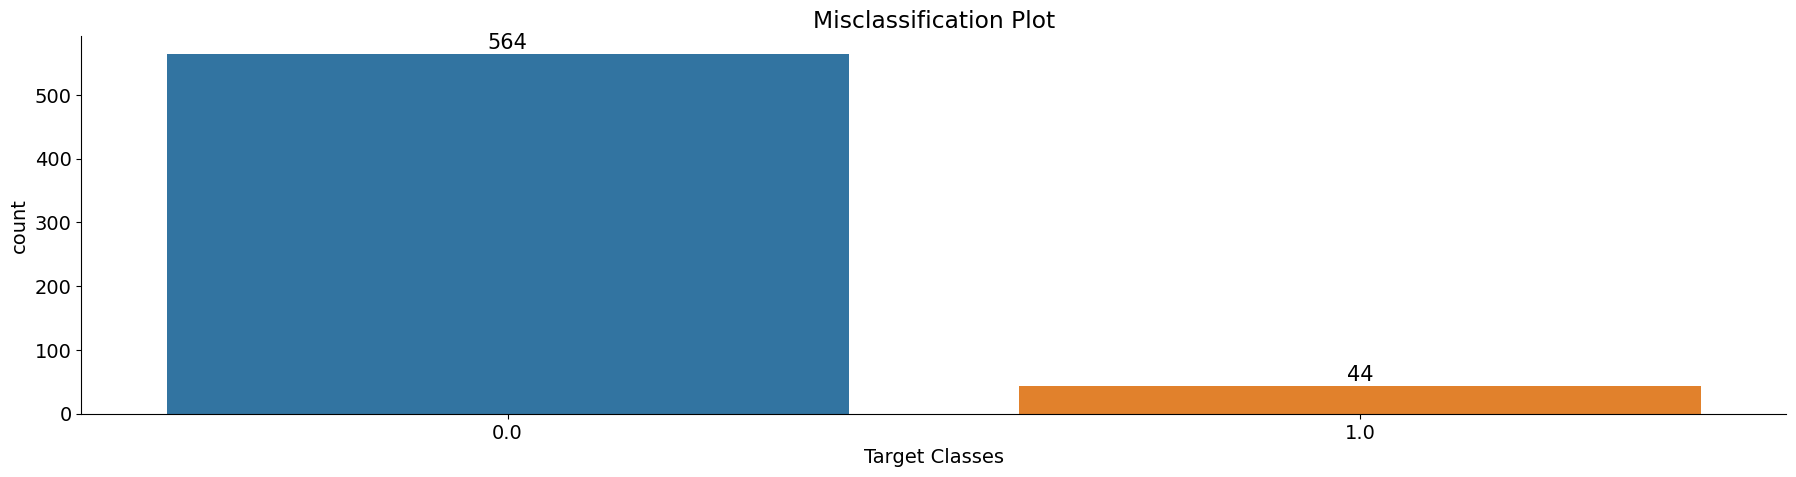

In [34]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Increasing Depth even further
    
</h2>
</div>
    
</center>

In [35]:
model = XGBClassifier(max_depth=15, learning_rate=0.1, reg_lambda=0.6)
history = model.fit(X_train, y_train, early_stopping_rounds =2, eval_set =[(X_train, y_train), (X_test, y_test)], verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.69      0.32      0.44       674
         1.0       0.49      0.82      0.61       533

    accuracy                           0.54      1207
   macro avg       0.59      0.57      0.52      1207
weighted avg       0.60      0.54      0.51      1207



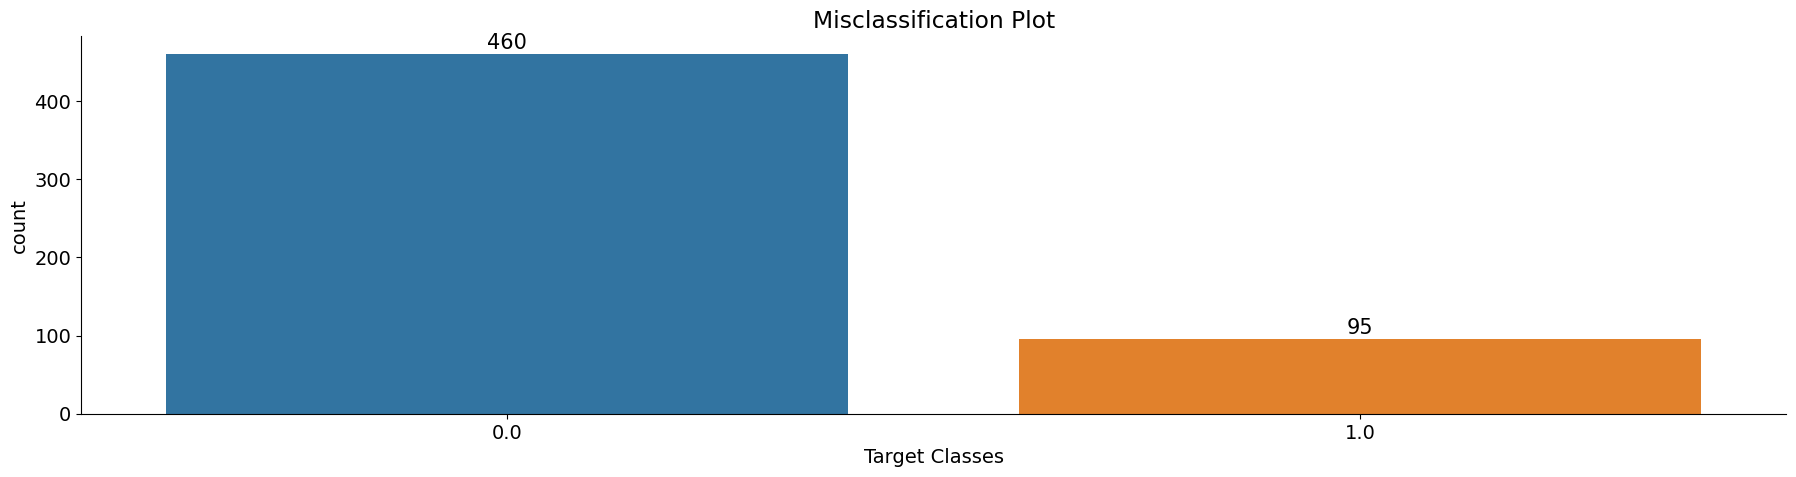

In [36]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
    
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Hyperparameter tuning using GridSearchCV
    
</h2>
</div>
    
</center>

Since **XGBoost** does *pruning* of the trees, we also want to ensure that the model doesn't over fit hence we are tuning the parameters as well to be on the safer side.

In [37]:
param_grid = { 'max_depth' : [18, 21, 25],
             'reg_lambda': [0.1, 0.4, 0.8]
             }

In [38]:
clf = GridSearchCV(model, param_grid= param_grid, cv=3)
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=15, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                          

In [39]:
print(f'The best parameters are {clf.best_params_}')

The best parameters are {'max_depth': 21, 'reg_lambda': 0.1}


In [40]:
print(f'The best model is {clf.best_estimator_}')

The best model is XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=21, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, ...)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Training after hyperparameter tuning
    
</h2>
</div>
    
</center>

In [41]:
model = XGBClassifier(max_depth=25, learning_rate=0.1, reg_lambda=0.8)
history = model.fit(X_train, y_train, early_stopping_rounds =10, eval_set =[(X_train, y_train), (X_test, y_test)], 
                    eval_metric=["error", "logloss"],verbose=0)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.32      0.44       674
         1.0       0.49      0.83      0.62       533

    accuracy                           0.54      1207
   macro avg       0.60      0.57      0.53      1207
weighted avg       0.61      0.54      0.52      1207



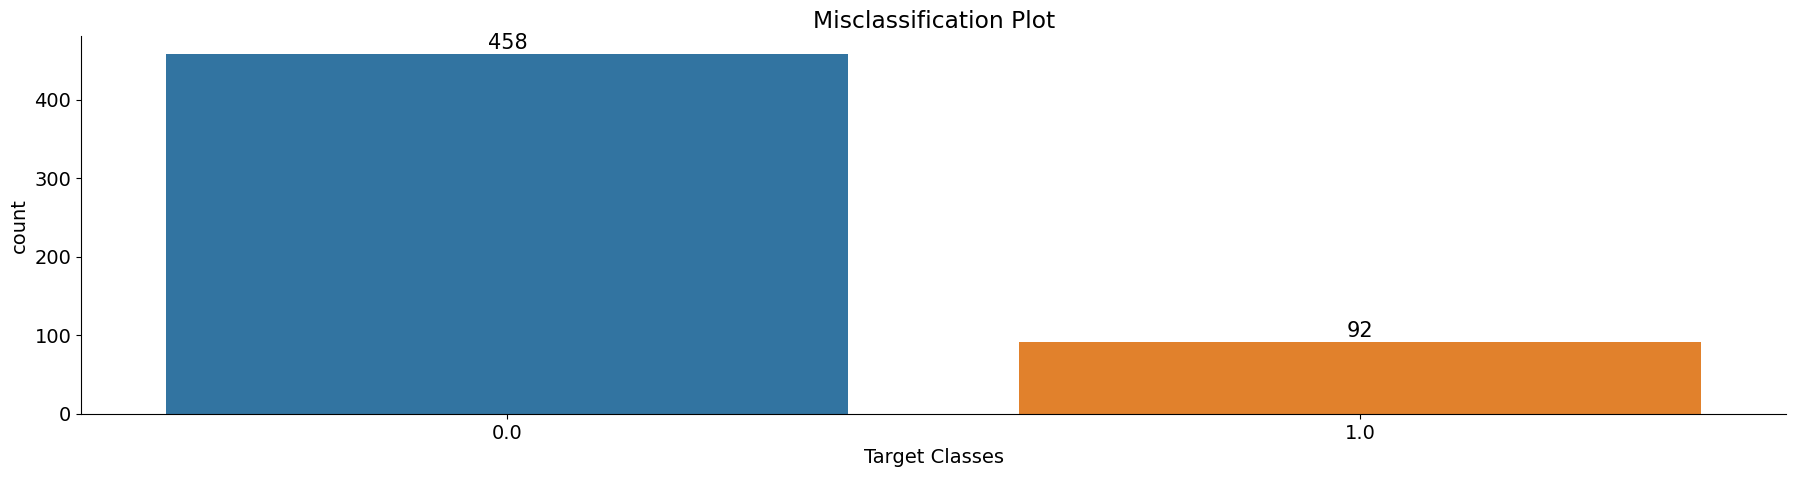

In [42]:
ax = sns.countplot(y_test[y_test != predictions])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.title('Misclassification Plot')

#adding data labels
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.show()

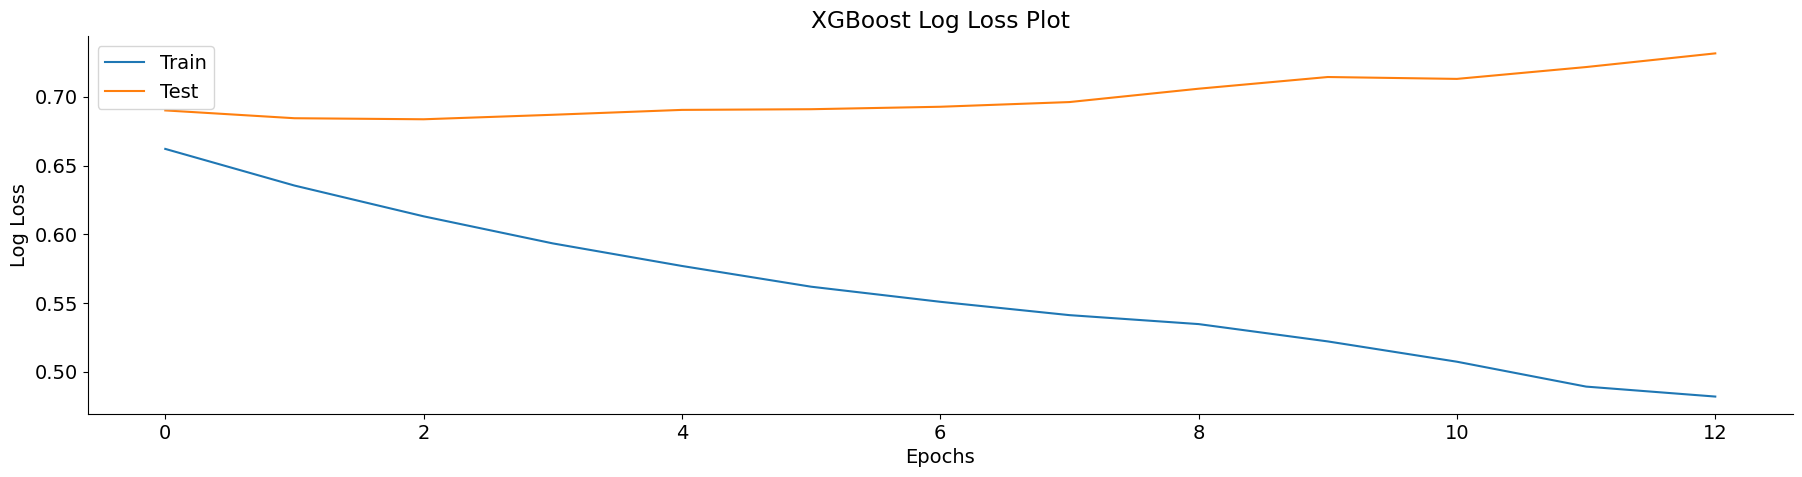

In [43]:
#get the number of epochs (iterations) used in training
epochs = len(history.evals_result_['validation_0']['error'])

#create a range from 0 to the number of epochs
x_axis = range(0, epochs)

#create a figure and axes for plotting
fig, ax = plt.subplots()

#plot the training and test log loss values against the x-axis (epochs)
ax.plot(x_axis, history.evals_result_['validation_0']['logloss'], label='Train')
ax.plot(x_axis, history.evals_result_['validation_1']['logloss'], label='Test')

#hide the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#show the legend
ax.legend()

#label the axes and add a title
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')

#show the plot
plt.show()

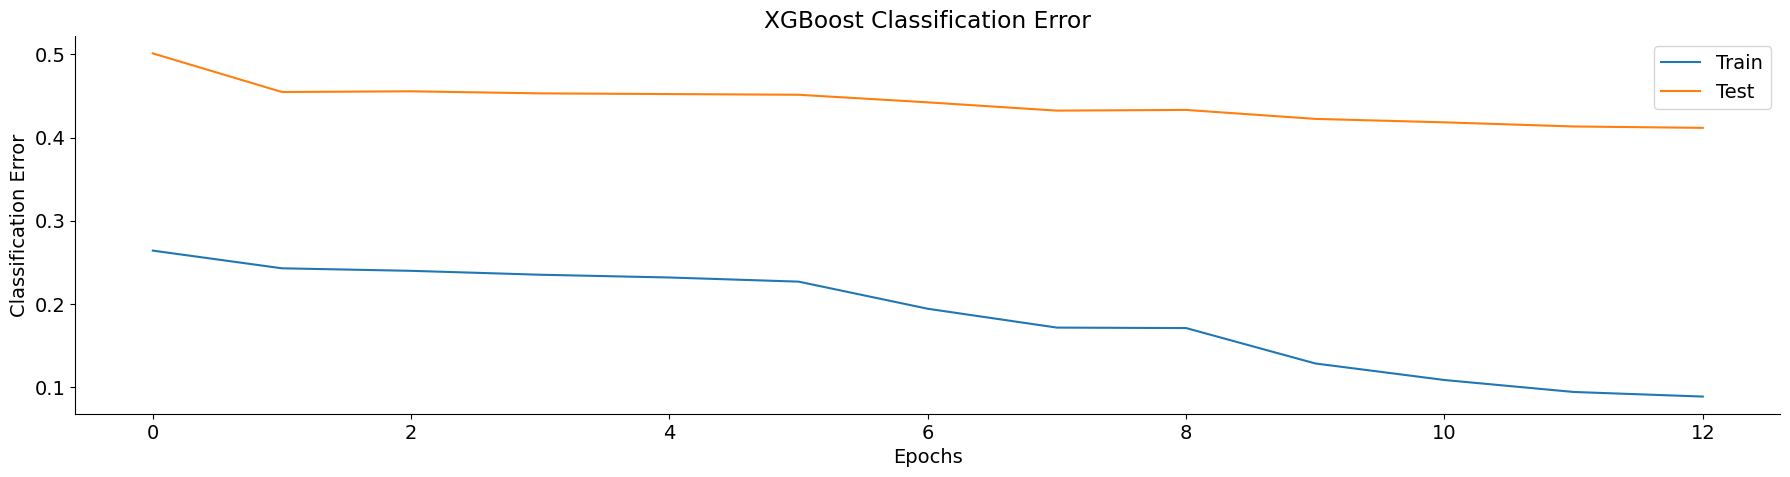

In [44]:
#This line sets the epochs equal to the length of the history object's evaluation result
epochs = len(history.evals_result_['validation_0']['error'])

#This line sets the x-axis range for the graph as 0 to the number of epochs
x_axis = range(0, epochs)

#This line creates the figure and axis objects for the graph
fig, ax = plt.subplots()

#This line plots the training error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_0']['error'], label='Train')

#This line plots the test error against the x-axis
ax.plot(x_axis, history.evals_result_['validation_1']['error'], label='Test')

#This line removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line adds a legend to the plot
ax.legend()

#This line labels the x-axis as 'Epochs'
plt.xlabel('Epochs')

#This line labels the y-axis as 'Classification Error'
plt.ylabel('Classification Error')

#This line titles the plot as 'XGBoost Classification Error'
plt.title('XGBoost Classification Error')

#This line displays the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Backtesting
    
</h2>
</div>
    
</center>


<p align="justify"> 
Backtesting is the general method for seeing how well a strategy or model would have done ex-post. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward
</p>

### Understanding Backtesting
    
<p align="justify"> 
Backtesting allows a trader to simulate a trading strategy using historical data to generate results and analyze risk and profitability before risking any actual capital.

A well-conducted backtest that yields positive results assures traders that the strategy is fundamentally sound and is likely to yield profits when implemented in reality. In contrast, a well-conducted backtest that yields suboptimal results will prompt traders to alter or reject the strategy.
</p>

In [45]:
def backtest(data, model, predictors, start=1000, step=50):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        # Fit the model
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        #append the combined values to the predictions 
        predictions.append(combined)
    
    return pd.concat(predictions)

In backtesting, what we are doing is **training the model on first 1000 rows** and then **testing the model on next 50 rows** and this is being done for the entire dataset. This will ensure our model learns from each iteration and is able to make better predictions. 

While making predictions we are using something known as `predict_proba` which is basically giving us the probabilities. The model usually has **0.5 as the threshold** for classifying the data points but we are taking it a step further to 0.6 and then returning those predictions. Feel free to play around with the value and see if values greater than 0.6 and less than 1 are able to give you better results.

In [46]:
start = time.time()
backtestpredictions = backtest(df, model, predictors)
end = time.time()
print(f'Time Elapsed in Backtesting : {round(end-start,2)} seconds')

Time Elapsed in Backtesting : 92.06 seconds


In [47]:
backtestpredictions

,Target,Predictions
Date,,
2008-08-12 00:00:00-04:00,1.0,1.0
2008-08-13 00:00:00-04:00,1.0,0.0
2008-08-14 00:00:00-04:00,0.0,0.0
2008-08-15 00:00:00-04:00,1.0,1.0
2008-08-18 00:00:00-04:00,1.0,1.0
...,...,...
2022-12-23 00:00:00-05:00,0.0,0.0
2022-12-27 00:00:00-05:00,1.0,1.0
2022-12-28 00:00:00-05:00,0.0,0.0


In [48]:
print('Precision Score before adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score before adding predictors 67.79


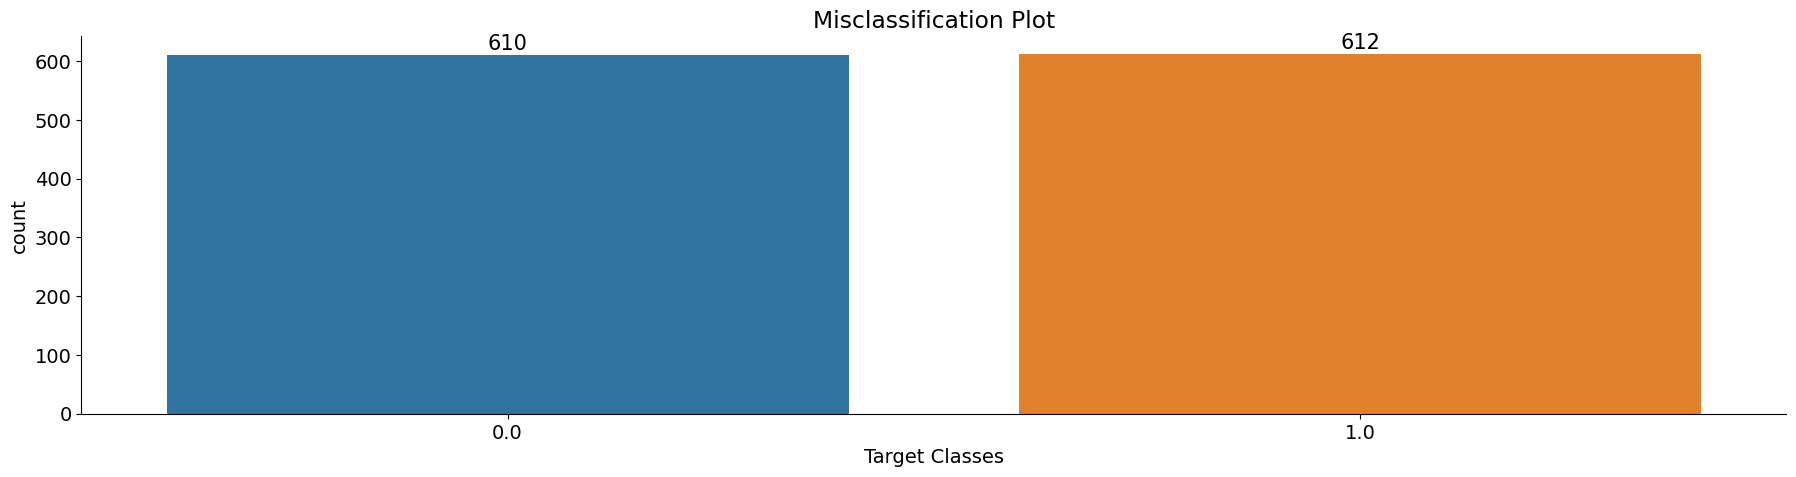

In [49]:
#This line creates a countplot from the data in the "backtestpredictions" dataframe, with the x-axis representing the target classes
ax = sns.countplot(backtestpredictions['Target'][backtestpredictions['Target'] != backtestpredictions['Predictions']])

#This line removes the top and right spines of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#This line sets the x-axis label
plt.xlabel('Target Classes')

#This line sets the title of the plot
plt.title('Misclassification Plot')

#This loop iterates through each bar in the plot, and adds an annotation with the count of that bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#This line shows the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Adding More Predictors to get better precision
    
</h2>
</div>
    
</center>

One of the ways you can increase model performance is **feature engineering** and that's exactly what we are going to do. In the below code cell, we are adding weekly average, quarterly average, yearly average. 

We are also finding if the weekly trend of our target meaning what was the trend of the price during the week. We are also adding bunch of percentages i.e open-close ratio, annual quarterly mean etc. that would give the model more information about the data and the trend.

Read more [here](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning) on feature selection

In [50]:
# Calculate rolling means
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

# Calculate the weekly trend
weekly_trend = df.shift(1).rolling(7).mean()["Target"]

# Compute the rolling mean ratios and other ratios
df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

#Adding Annual and weekly trends
df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

#Calculate ratio of open and close
df["open_close_ratio"] = df["Open"] / df["Close"]

#Calculate ratio of high and close
df["high_close_ratio"] = df["High"] / df["Close"]

#Calculate ratio of low and close
df["low_close_ratio"] = df["Low"] / df["Close"]

In [51]:
df.head()

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882


In [52]:
df.shape

(4623, 15)

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Imputing Null Values
    
</h2>
</div>
    
</center>

**Imputing Null values** is the process of filling the missing values. Although XGBoost is capable enough of handling missing values, many algorithms might not have such in-built capability. As a general guideline, it's always good to impute the null values. 

Here we are imputing null values because of the backtesting we did earlier. For some of the rows there were no previous data available given the time frame (weekly, annually etc) hence there are some `NaN` values which we will treat by filling the values as 0. This may not be the best strategy but this is the one we are going with.

In [53]:
#iterating over the range of the length of the df DataFrame
for i in range(len(df.columns)):
    #checking if the null value of the particular column is greater than zero
    if df[df.columns[i]].isnull().sum()>0:
        #printing the column number and name that has null values
        print(f'Column {i} {df.columns[i]} has null values')

Column 6 weekly_mean has null values
Column 7 quarterly_mean has null values
Column 8 annual_mean has null values
Column 9 annual_weekly_mean has null values
Column 10 annual_quarterly_mean has null values
Column 11 weekly_trend has null values


In [54]:
#filling the missing values with zero
df.fillna(0, inplace=True)

In [55]:
#checking if the values have been filled or not
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Target                   0
weekly_mean              0
quarterly_mean           0
annual_mean              0
annual_weekly_mean       0
annual_quarterly_mean    0
weekly_trend             0
open_close_ratio         0
high_close_ratio         0
low_close_ratio          0
dtype: int64

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Backtesting with new predictors
    
</h2>
</div>
    
</center>

Okay so now that we have added more columns to the data, let's use them to see much of a difference it makes if use them.

In [56]:
predictors  = ['Open', 'High','Low','Close','Volume','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [57]:
start = time.time()
backtestpredictions = backtest(df, model, predictors)
end = time.time()
print(f'Time Elapsed in Backtesting : {round(end-start,2)} seconds')

Time Elapsed in Backtesting : 95.08 seconds


In [58]:
print('Precision Score after adding predictors',
       round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score after adding predictors 85.28


In [59]:
print(classification_report(backtestpredictions['Target'], backtestpredictions['Predictions']))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      1727
         1.0       0.85      0.80      0.83      1896

    accuracy                           0.82      3623
   macro avg       0.83      0.83      0.82      3623
weighted avg       0.83      0.82      0.82      3623




<center>
<div class="alert alert-block alert-success">  
<b>SUCCESS:</b> By adding more predictors, we have been able to get to a better percentage of precision.
</div>
</center>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: white;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black ;">Using Neural Network for predictions
    
</h2>
</div>
    
</center>

For a Sequential data like Stock Market, using a model that doesn't use the sequence of the data to predict the values is probably not a good idea because some or the other way we are loosing the information that's hidden in the sequence of the data. 

**Enter Recurrent Neural Network**

Neural Networks are widely used these days for many tasks. Take the example of GMail, the autocompletion feature is there because of the Neural Networks being able to predict the sequence of the next word. The kind of the Neural Networks that enables the predictions is called Recurrent Neural Network.

There are basically 3 types of Recurrent Neural Networks. 

1. **RNN** (Recurrent Neural Networks), 
2. **LSTM** (Long Short Term Memory); and 
3. **GRU** (Gated Recurrent Unit)

RNNs are not used that much because of the vanishing gradient descent problem which basically means the longer the network gets, the earliest neurons stop training because the weights become so small there is hardly any change in them. 

LSTMs and GRUs however have a different mechanism that overcomes this issue of gradient descent. The in-depth working of LSTM and GRUs is beyond the scope of the notebook however the GIF below helps us understand the working of GRU a bit better

**P.s** GRUs are fast and efficient since they have only 2 gates which results in lesser parameters as compared to LSTMs. We are going to be using GRU for the prediction of the Stock Market.

<center> <img src="https://camo.githubusercontent.com/135060228df108b629a4e64e175962552df9d813119769461cb6f9bb30f13bf3/68747470733a2f2f692e696d6775722e636f6d2f3577333775587a2e676966"> </center>

In [60]:
df

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972570,1.000371,0.969882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,88.160004,88.540001,86.320000,87.760002,27658300.0,0.0,1.027136,1.135681,1.409770,1.372525,1.241343,0.428571,1.004558,1.008888,0.983592
2022-12-27 00:00:00-05:00,87.110001,89.550003,87.070000,89.230003,22994400.0,1.0,1.000865,1.113196,1.385385,1.384188,1.244512,0.285714,0.976241,1.003586,0.975793
2022-12-28 00:00:00-05:00,88.800003,88.940002,87.010002,87.389999,20097300.0,0.0,1.016265,1.132466,1.413313,1.390693,1.247996,0.428571,1.016135,1.017737,0.995652


In [61]:
#getting rid of the volume and target columns and using these predictors 
predictors  = ['Open', 'High','Low','Close','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [62]:
#creating a new dataframe with the new predictors
NN_df = df[predictors]

In [63]:
NN_df.head()

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,0.0,0.0,0.0,0.0,0.0,0.0,0.932601,1.007109,0.927892
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,0.0,0.0,0.0,0.0,0.0,0.0,1.012340,1.037294,0.996801
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,0.0,0.0,0.0,0.0,0.0,0.0,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,0.0,0.0,0.0,0.0,0.0,0.0,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,0.0,0.0,0.0,0.0,0.0,0.0,0.972570,1.000371,0.969882


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Scaling Input data
    
</h2>
</div>
    
</center>

**Types of scaling in machine learning**

1. **Normalization**: Normalization is a technique used to scale a dataset so that all values are within a similar range, usually between 0 and 1, or -1 and 1. Typically, this is done by subtracting the mean of the dataset from the value of each element and then dividing the result by the standard deviation. 

2. **Standardization**: Standardization is a technique used to scale a dataset so that its mean is 0, and its standard deviation is 1. This is done by subtracting the mean from each value and dividing it by the standard deviation.

3. **Min-Max Scaling**: Min-Max scaling is a technique used to scale a dataset so that the values lie within a defined range. Typically, this range is between 0 and 1, or -1 and 1. Min-Max scaling involves subtracting the minimum value from each element, and then dividing that result by the difference between the maximum and minimum values.

4. **Robust Scaling**: Robust scaling is a technique used to scale a dataset so that it is robust to outliers. It works by subtracting the median of the dataset from each element and then dividing it by the interquartile range. This ensures that the scaling takes into account the outliers, so they don't affect the overall scaling.

In [64]:
#Initiating the MinMaxScaler object
scaler = MinMaxScaler()
#Fitting the data on the NN_df dataframe
scaler.fit(NN_df[NN_df.columns])
#Transforming the values after fitting the data
NN_df[NN_df.columns] = scaler.transform(NN_df[NN_df.columns])

As we can now see that the data is now scaled which is super helpful for faster convergence of a neural network.

In [65]:
NN_df

,Open,High,Low,Close,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,
2004-08-23 00:00:00-04:00,0.000306,0.001233,0.000267,0.001410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072369,0.063719,0.415891
2004-08-24 00:00:00-04:00,0.001945,0.001972,0.001728,0.001595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.511416,0.334254,0.974084
2004-08-25 00:00:00-04:00,0.002027,0.001656,0.000791,0.000825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777920,0.575175,0.899585
2004-08-26 00:00:00-04:00,0.000971,0.001051,0.000844,0.001017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389449,0.169106,0.837990
2004-08-27 00:00:00-04:00,0.000969,0.001043,0.000978,0.001342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292438,0.003323,0.756032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,0.575916,0.577139,0.572615,0.578660,0.907612,0.711451,0.692607,0.719095,0.811573,0.428571,0.468566,0.079658,0.867084
2022-12-27 00:00:00-05:00,0.568858,0.583917,0.577737,0.588637,0.884398,0.697365,0.680627,0.725205,0.813644,0.285714,0.312653,0.032142,0.803910
2022-12-28 00:00:00-05:00,0.580218,0.579823,0.577327,0.576148,0.898007,0.709437,0.694348,0.728614,0.815922,0.428571,0.532308,0.158966,0.964777


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Generating Input and Output Data
    
</h2>
</div>
    
</center>

In [66]:
def df_to_X_y2(df, window_size=16):
    """
    Function to convert a dataframe of values into X (data) and y (labels)
    
    Parameters: 
       df: Pandas DataFrame
       window_size: integer representing the size of the window to be used (default 16)
       
    Returns: 
       X: Numpy array of data
       y: Numpy array of labels
    """
    # Convert DataFrame to Numpy array
    df_as_np = df.to_numpy()
    #initiate the empty lists
    X = []
    y = []
    # Iterate through the array, adding the window of values to X and the corresponding label to y
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        #Append the row to X list
        X.append(row)
        label = df_as_np[i+window_size][0]
        #appending the labels to y list
        y.append(label)
    # Return X and y as Numpy arrays
    return np.array(X), np.array(y)

In [67]:
#Generating the X and y values using the function we just created
X, y = df_to_X_y2(NN_df)

print(f'X shape {X.shape} y shape {y.shape}')
print(f'There are {X.shape[0]} samples, {X.shape[1]} timesteps and {X.shape[2]} features in the our data')

X shape (4607, 16, 13) y shape (4607,)
There are 4607 samples, 16 timesteps and 13 features in the our data


In [68]:
y

array([0.00138946, 0.00191261, 0.00221203, ..., 0.58021823, 0.5679844 ,
       0.56556452])

In [69]:
# Scaling y with a scaler object 
# np.expand_dims(y, axis=1) adding single dimension to y 
# scaler.fit_transform(x) fits the scaler to the data x and return the scaled data 
# np.squeeze(x) remove single dimension to the data x 

y = np.squeeze(scaler.fit_transform(np.expand_dims(y, axis=1)))

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Train Test Split
    
</h2>
</div>
    
</center>

- Train/test split is an **important process** used in machine learning to **assess the performance** of a model on unseen data. 

- By splitting a dataset into two parts, a training set to train the model and a test set to evaluate its performance, we can get a **better understanding** of how well the model generalizes to new data. 

- This process helps us **avoid overfitting**, which occurs when a model performs well on the training set but poorly on the test set due to over-learning the training data.

In [70]:
#Setting the threshold for splitting the data 
threshold = int(X.shape[0] * 0.75)  # 75% of data for training

# 75% of data for training
X_train, y_train = X[:threshold], y[:threshold]

# 25% of data for testing
X_test, y_test = X[threshold:], y[threshold:]

# Print shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3455, 16, 13)
y_train shape: (3455,)
X_test shape: (1152, 16, 13)
y_test shape: (1152,)


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Building and Training The Model
    
</h2>
</div>
    
</center>

1. **Set up the model architecture**: In this step, we will define the model architecture which will be used for training. We will include one or more layers, the type of layer, the number of neurons, the activation function, and the input shape.

2. **Compile the model**: Next, we will compile the model by specifying the loss function, the optimizer, and any other metrics that we wish to monitor.

3. **Train the model**: Finally, we will train the model by specifying the number of epochs, the batch size, and the training data.

4. **Evaluate the model**: Once the model is trained, we will evaluate it by computing the accuracy and other performance metrics on the validation data.

In [71]:
# Define a Sequential model
model = Sequential()

# Add an input layer with the same shape as the training data
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))

# Add a GRU layer with 64 hidden states
model.add(GRU(64))

# Add a Dense layer with 8 neurons and ReLU activation
model.add(Dense(8, 'relu'))

# Add an output layer with 1 neuron and linear activation
model.add(Dense(1, 'linear'))

# Print a summary of the model
model.summary()

2022-12-31 19:27:10.408759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 19:27:10.412698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 19:27:10.413500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-31 19:27:10.414771: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                15168     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 15,697
Trainable params: 15,697
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Create an early stopping callback to monitor the validation loss
callback = EarlyStopping(
    # Monitor the validation loss
    monitor="val_loss",
    # Minimum change in loss to qualify as an improvement
    min_delta=0.001,
    # Stop training if no improvement in 3 consecutive epochs
    patience=3,
    # Verbosity mode
    verbose=1,
    # Automatically choose the mode
    mode="auto",
    # Baseline value for the monitored quantity
    baseline=None,
    # Whether to restore model weights from the best epoch
    restore_best_weights=False
)

In [73]:
#Compiling the model 
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [74]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=callback)

2022-12-31 19:27:16.022212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-31 19:27:18.384497: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


108/108 [==============================] - 4s 8ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 4.3181e-04 - val_root_mean_squared_error: 0.0208
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 2.1425e-05 - root_mean_squared_error: 0.0046 - val_loss: 4.3143e-04 - val_root_mean_squared_error: 0.0208
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 1.1992e-05 - root_mean_squared_error: 0.0035 - val_loss: 3.7722e-04 - val_root_mean_squared_error: 0.0194
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 1.1151e-05 - root_mean_squared_error: 0.0033 - val_loss: 3.1386e-04 - val_root_mean_squared_error: 0.0177
Epoch 00004: early stopping


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Making Predictions using GRU
    
</h2>
</div>
    
</center>

Things to keep in mind while Making Predictions using GRU

1. **Ensure that your data is normalized**: It is important to ensure that your data is normalized before feeding it into the GRU model. This helps to ensure that the model is not biased towards any particular feature.

2. **Choose an appropriate learning rate**: Choose a learning rate that is not too large or too small. This will help to ensure that the model does not overfit or underfit the data.

3. **Use proper regularization**: Regularization helps to prevent overfitting and underfitting. It is important to use proper regularization techniques such as dropout, L2 regularization, or early stopping to ensure that the model does not overfit or underfit the data.

4. **Tune the model hyperparameters**: It is important to tune the model hyperparameters such as the number of layers, the number of neurons per layer, the optimizer, etc. to ensure that the model is able to generalize well on unseen data.

5. **Use a good validation strategy**: A good validation strategy is important to ensure that the model is able to generalize well on unseen data. It is important to use a good validation strategy such as cross-validation, holdout, or bootstrapping to ensure that the model is able to generalize well.

In [75]:
#using GRU model to predict the values on X_test and then converting the data to 1D array
test_predictions = model.predict(X_test).flatten()
#creating a dataframe to compare the test predictions and actuals
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
#displaying the values
test_results

,Test Predictions,Actuals
0,0.361178,0.370515
1,0.364418,0.369879
2,0.365032,0.367122
3,0.364358,0.362622
4,0.364187,0.363205
...,...,...
1147,0.584499,0.575326
1148,0.577893,0.568258
1149,0.577135,0.579634
1150,0.574426,0.567383


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Plotting Predictions and Actuals
    
</h2>
</div>
    
</center>

- Plotting targets and predictions helps to visualize how well a model is performing and see how closely the predictions are to the target values. It can help to identify errors in the model and examine where additional effort should be focused. 

- Additionally, it can be helpful to compare the performance of a model over time, making it easier to adjust for improved results.

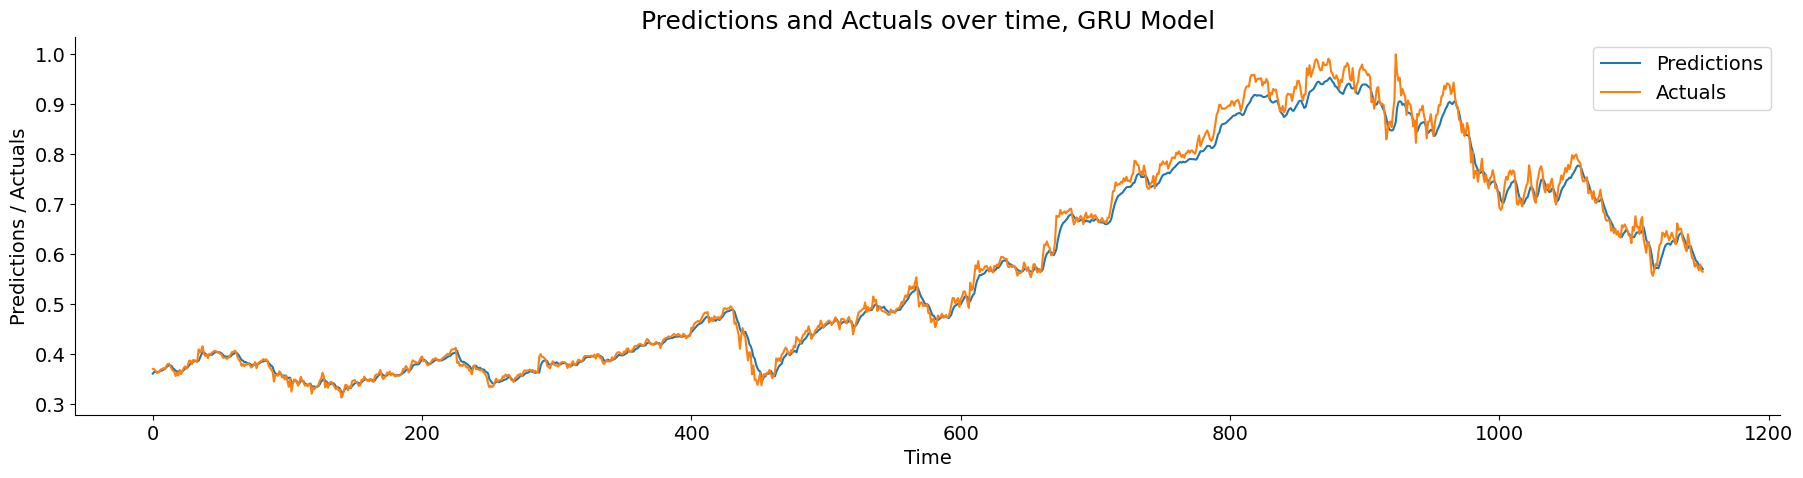

In [76]:
# plot predictions
plt.plot(test_results['Test Predictions']) 
# plot actual values
plt.plot(test_results['Actuals'])
#removing top spine
plt.gca().spines['top'].set_visible(False)
#removing right spine
plt.gca().spines['right'].set_visible(False)
#adding legend to the chart
plt.legend(['Predictions', 'Actuals'])
#setting y-axis label
plt.ylabel('Predictions / Actuals')
#setting x-axis label
plt.xlabel('Time')
#giving the chart title
plt.title('Predictions and Actuals over time, GRU Model', fontsize=18)
#displaying the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Performance Evaluation
    
</h2>
</div>
    
</center>

- Model evaluation is important because it helps to ensure that a machine learning model is working properly and is suitable for its intended purpose. 

- It also helps to identify potential issues with the model, such as overfitting, underfitting, bias, and variance. 

- By performing model evaluation, data scientists can make sure that the model is optimized to best represent the data and is giving accurate predictions. 

- Ultimately, model evaluation helps to improve the accuracy, reliability, and performance of the machine learning model.

In [77]:
print('MSE of the GRU model :', round(mse(test_results['Test Predictions'], test_results['Actuals']),6))

MSE of the GRU model : 0.000314


Inspiration for this notebook - [Link
](http://https://www.youtube.com/watch?v=SYrFhugaoZk)

<p>

THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK. IF YOU LIKED THE WALKTHROUGH, I WOULD APPRECIATE IF YOU COULD LEAVE AN UPVOTE AND FOLLOW ME FOR MORE!!

</p>